# DATA VISUALIZATION PYTHON

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import plotly.express as px
import datetime

In [8]:
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

In [9]:
def get_city_data(city):
    city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()
    
    list_of_dicts = []
    for city_bike_dict in city_bike_networks['networks']:
        new_city = city_bike_dict['location']['city']
        if new_city.lower() == city.lower():
            list_of_dicts.append(city_bike_dict)
            
    return list_of_dicts

In [10]:
city_names = ['Stavnger', 'Copenhagen', 'Utrecht', 'Alma de Murcia', 'Aranjuez', 'Paris']

for each_city in city_names:
    print(get_city_data(each_city))
    print("-------------------\n")

[]
-------------------

[]
-------------------

[]
-------------------

[]
-------------------

[]
-------------------

[{'company': None, 'ebikes': True, 'gbfs_href': 'https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/gbfs.json', 'href': '/v2/networks/velib', 'id': 'velib', 'license': {'name': 'OPEN LICENCE 2.0', 'url': 'etalab.gouv.fr/wp-content/uploads/2018/11/open-licence.pdf'}, 'location': {'city': 'Paris', 'country': 'FR', 'latitude': 48.856614, 'longitude': 2.3522219}, 'name': "Velib' Métropôle"}]
-------------------



In [11]:
get_city_data("Antwerpen")

[{'company': ['ClearChannel'],
  'href': '/v2/networks/velo-antwerpen',
  'id': 'velo-antwerpen',
  'location': {'city': 'Antwerpen',
   'country': 'BE',
   'latitude': 51.216667,
   'longitude': 4.4},
  'name': 'Velo Antwerpen'}]

In [13]:
def get_stations_info(city):
    
    station_dict = get_city_data(city)
    if not station_dict:
        print("Error: No bike company found for {}".format(city))
        return None
    
    network_address = station_dict[0]['href']
    url = "http://api.citybik.es/{}".format(network_address)
    return requests.get(url).json()['network']['stations']

In [14]:
city = "Antwerpen"
station_info = get_stations_info(city)
station_info

[{'empty_slots': 17,
  'extra': {'address': 'Koningin Astridplein', 'status': 'OPN', 'uid': 1},
  'free_bikes': 15,
  'id': '670e2836abf87ddc702ad790abaf8f10',
  'latitude': 51.21782,
  'longitude': 4.42065,
  'name': '001- Centraal Station - Astrid',
  'timestamp': '2022-12-11T18:46:47.227000Z'},
 {'empty_slots': 0,
  'extra': {'address': 'Groenkerkhofstraat/Nationalestraat',
   'status': 'OPN',
   'uid': 20},
  'free_bikes': 27,
  'id': 'ebdaa116e2ddfb4a3010a2847e69f60f',
  'latitude': 51.2188,
  'longitude': 4.401,
  'name': '020- Groenplaats 2',
  'timestamp': '2022-12-11T18:46:47.239000Z'},
 {'empty_slots': 22,
  'extra': {'address': 'sint vincentius', 'status': 'OPN', 'uid': 93},
  'free_bikes': 8,
  'id': '7cc97751ec977d34fc265b65aa88732c',
  'latitude': 51.20541,
  'longitude': 4.41356,
  'name': '093- Sint Vincentius',
  'timestamp': '2022-12-11T18:46:47.287000Z'},
 {'empty_slots': 15,
  'extra': {'address': 'Paleisstraat ', 'status': 'OPN', 'uid': 94},
  'free_bikes': 16,
  '

In [20]:
def get_available_stations(city = "Antwerpen"):
    station_info = get_stations_info(city)
    
    station_list = []
    for info in station_info:
        
        a_dict = {
            'Station Name': info['name'],
            'empty_slots': info['empty_slots'],
            'free_bikes': info['free_bikes'],
            'payment': ', '.join(info['extra']['address']) if info['extra']['status'] else "No",
            'latitude': info['latitude'],
            'longitudee': info['longitude'],
            'timestamp': info['timestamp'],
            'Unique ID': info['extra']['uid'],
        }
        station_list.append(a_dict)
    return pd.DataFrame(station_list)

In [21]:
# Show available stations in Antwerpen
get_available_stations(city = "Antwerpen").sample(5)

Station Name  empty_slots  free_bikes  \
28        024- Opera           14          16   
16    010- NMBS Zuid           26           5   
96    096- Stadspark           15           7   
5   130- Lamoriniere            9           9   
18      012- Brussel           19          12   

                                              payment   latitude  longitudee  \
28     A, n, n, e, e, s, s, e, n, s, s, t, r, a, a, t  51.217959    4.417946   
16  D, e, s, g, u, i, n, l, e, i,  , -,  , M, o, n...  51.198470    4.390718   
96  R, u, b, e, n, s, l, e, i,  , –,  , L, o, u, i...  51.213282    4.413109   
5   L, a, m, o, r, i, n, i, è, r, e, s, t, r, a, a, t  51.203800    4.420800   
18  D, e,  , S, i, n, g, e, l, /,  , B, r, e, d, e...  51.199306    4.390135   

                      timestamp  Unique ID  
28  2022-12-11T18:51:56.536000Z         24  
16  2022-12-11T18:51:56.526000Z         10  
96  2022-12-11T18:51:56.608000Z         96  
5   2022-12-11T18:51:56.634000Z        130  
18  2022-12-11T18:51:56.527000Z         12

# Show Map

In [24]:
current_date = datetime.date.today()
current_date

datetime.date(2022, 12, 11)

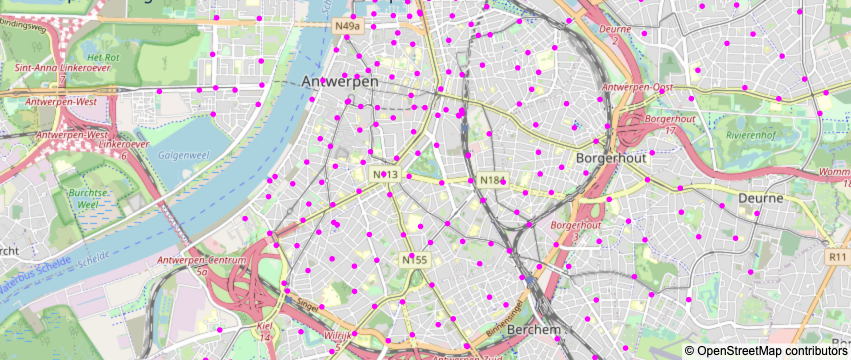

In [25]:
def show_map(station_info):
    
# Let's get the current date and time
    current_date = pd.to_datetime(station_info['timestamp'][0]).strftime('%a %d %B, %Y at %H:%M')

map_title = 'Map showing Number of Bikes in {} at {}'.format(city, current_date)

# Access token from plotly
#px.set_mapbox_access_token(ACCESS_MAP_TOKEN)

#fig = px.scatter_mapbox(station_data, lat="latitude", lon="longtitude", hover_name="Station Name", color="free_bikes",
                        #hover_data=["empty_slots", "free_bikes", "payment"],
                         #title=map_title,
fig = px.scatter_mapbox(station_info, lat="latitude", lon="longitude", hover_name="name", hover_data=["empty_slots", "free_bikes"],
                        title=map_title,
                        color_discrete_sequence=["fuchsia"], zoom=12, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()                      
#color_continuous_scale=px.colors.sequential.Plasma, size_max=20,zoom=12)
              

In [26]:
live_station_data = get_available_stations("Antwerpen")
show_map(live_station_data)

In [27]:
live_station_data

Station Name  empty_slots  free_bikes  \
0    001- Centraal Station - Astrid           19          13   
1                020- Groenplaats 2            1          26   
2              093- Sint Vincentius           22           8   
3                 094- Paleisstraat           15          16   
4              101- Premetro Handel           27           7   
..                              ...          ...         ...   
298                 335- Speelplein           34           2   
299              336 -Sneeuwbeslaan           25           5   
300          337 - Verenigde Naties           12          12   
301              340 - Dokter Donny           34           0   
302                342 - Nieuw Zuid           21          13   

                                               payment   latitude  longitudee  \
0    K, o, n, i, n, g, i, n,  , A, s, t, r, i, d, p...  51.217820    4.420650   
1    G, r, o, e, n, k, e, r, k, h, o, f, s, t, r, a...  51.218800    4.401000   
2          s, i, n, t,  , v, i, n, c, e, n, t, i, u, s  51.205410    4.413560   
3                P, a, l, e, i, s, s, t, r, a, a, t,    51.204800    4.396100   
4    L, a, n, g, e,  , S, t, u, i, v, e, n, b, e, r...  51.224100    4.432000   
..                                                 ...        ...         ...   
298  S, p, e, e, l, p, l, e, i, n, s, t, r, a, a, t...  51.248223    4.444239   
299  S, n, e, e, u, w, b, e, s, l, a, a, n, /, L, a...  51.175707    4.396217   
300  V, e, r, e, n, i, g, d, e,  , N, a, t, i, e, s...  51.163790    4.353356   
301  D, o, k, t, e, r,  , D, o, n, n, y, p, l, e, i, n  51.168131    4.404972   
302  J, o, s,  , S, m, o, l, d, e, r, e, n, s, t, r...  51.206260    4.383447   

                       timestamp  Unique ID  
0    2022-12-11T18:51:56.517000Z          1  
1    2022-12-11T18:51:56.533000Z         20  
2    2022-12-11T18:51:56.602000Z         93  
3    2022-12-11T18:51:56.606000Z         94  
4    2022-12-11T18:51:56.611000Z        101  
..                           ...        ...  
298  2022-12-11T18:51:56.784000Z        335  
299  2022-12-11T18:51:56.785000Z        336  
300  2022-12-11T18:51:56.786000Z        337  
301  2022-12-11T18:51:56.787000Z        340  
302  2022-12-11T18:51:56.788000Z        342  

[303 rows x 8 columns]

# Data exploration

In [28]:
live_station_data.corr()

empty_slots  free_bikes  latitude  longitudee  Unique ID
empty_slots     1.000000   -0.704315 -0.091817   -0.057707   0.319876
free_bikes     -0.704315    1.000000  0.049971    0.028802  -0.132236
latitude       -0.091817    0.049971  1.000000    0.434628  -0.339238
longitudee     -0.057707    0.028802  0.434628    1.000000  -0.020951
Unique ID       0.319876   -0.132236 -0.339238   -0.020951   1.000000

<AxesSubplot:>

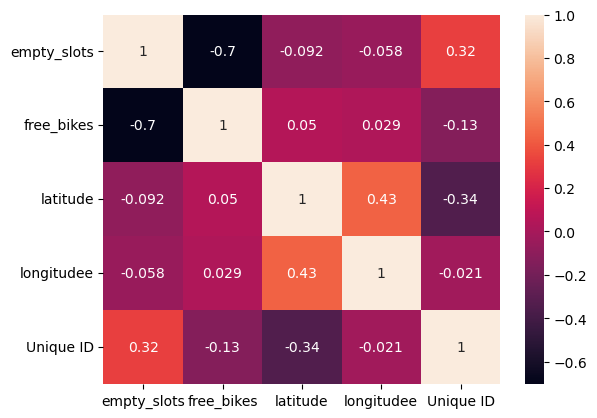

In [30]:
sns.heatmap(live_station_data.corr(),annot=True)

In [37]:
corr_matrix = live_station_data.corr()
corr_matrix = ["y"].sort(reverse=False)

# Visualizations

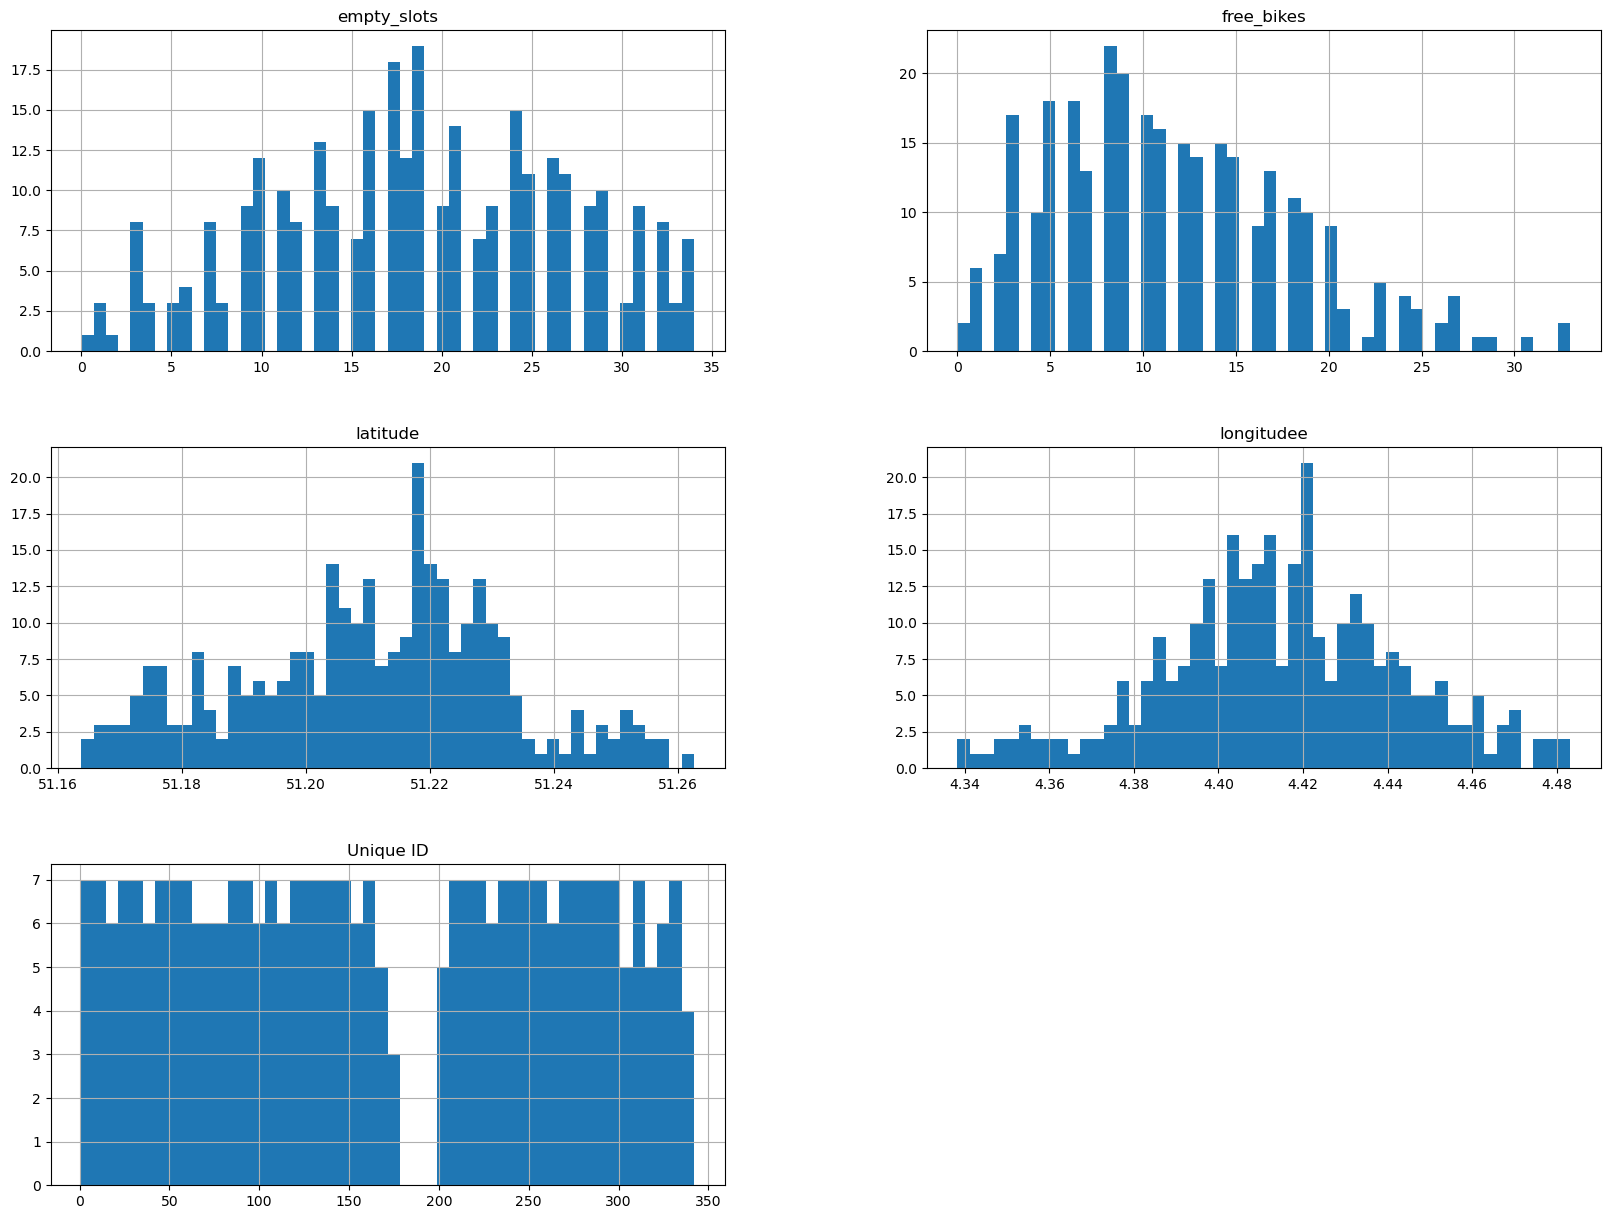

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
live_station_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

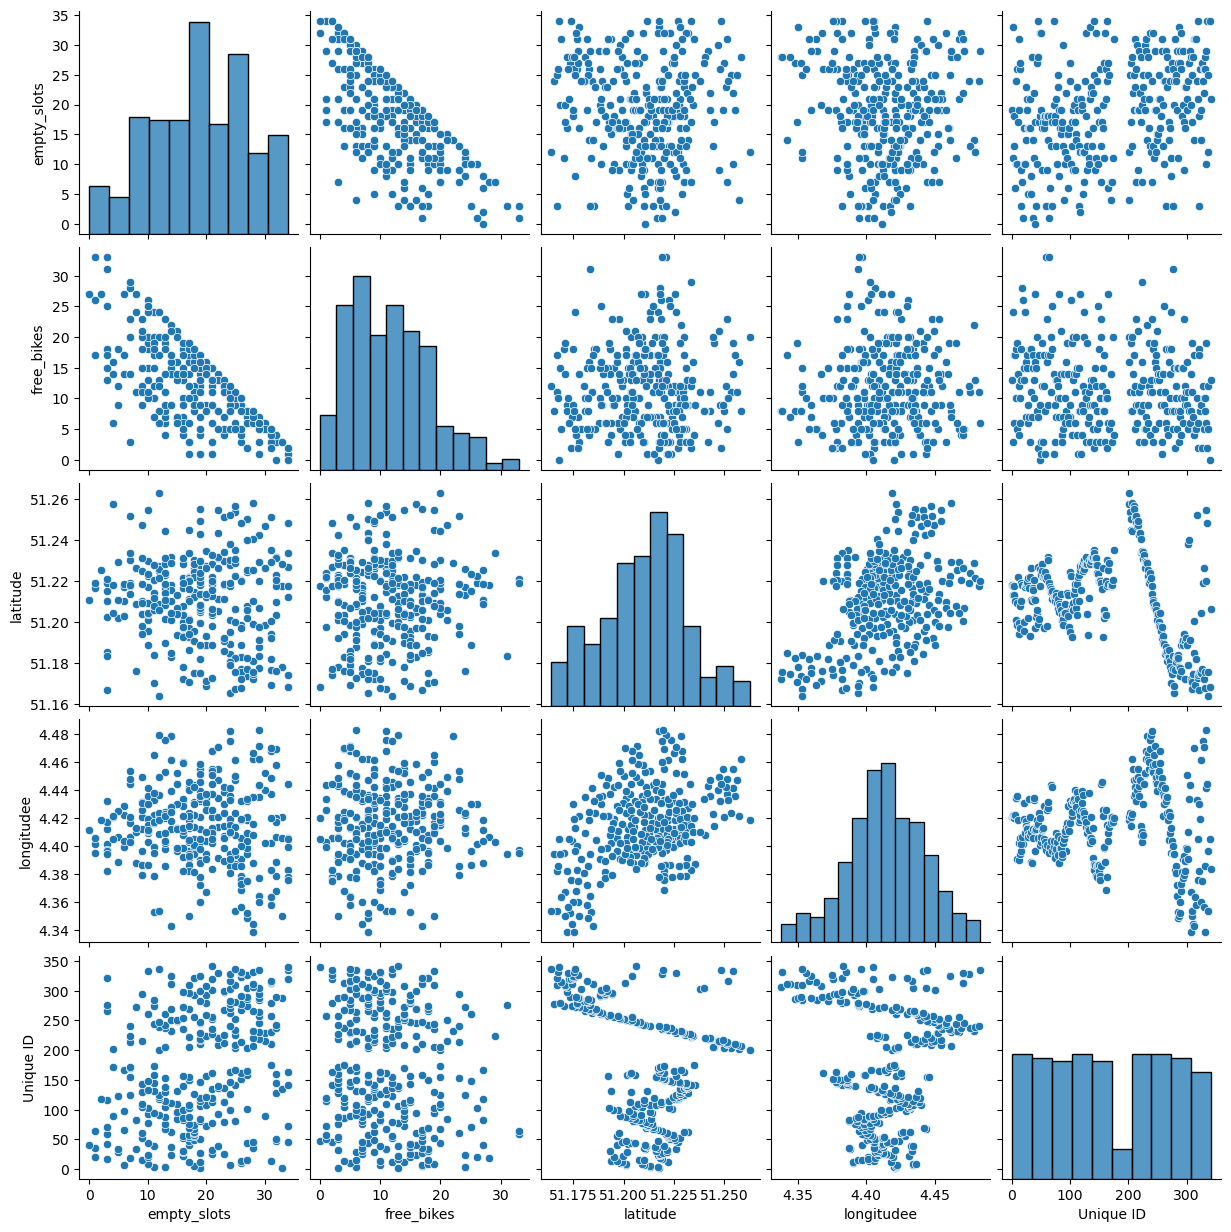

In [38]:
sns.pairplot(live_station_data)

# Histogram

Text(0, 0.5, 'free_bikes')

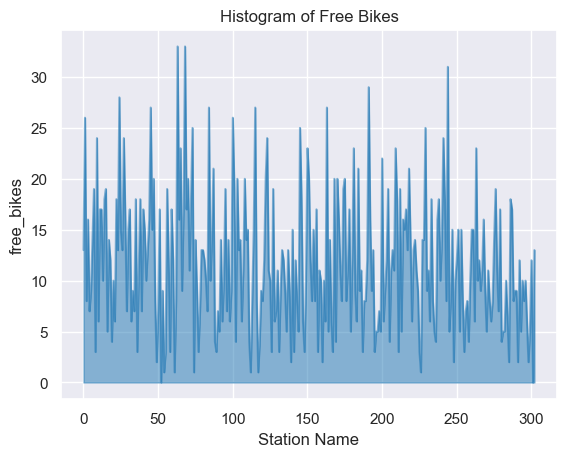

In [42]:
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
live_station_data.free_bikes.plot.area(color='tab:blue',stacked=None)
plt.title('Histogram of Free Bikes')
plt.xlabel('Station Name')
plt.ylabel('free_bikes')

<AxesSubplot:ylabel='free_bikes'>

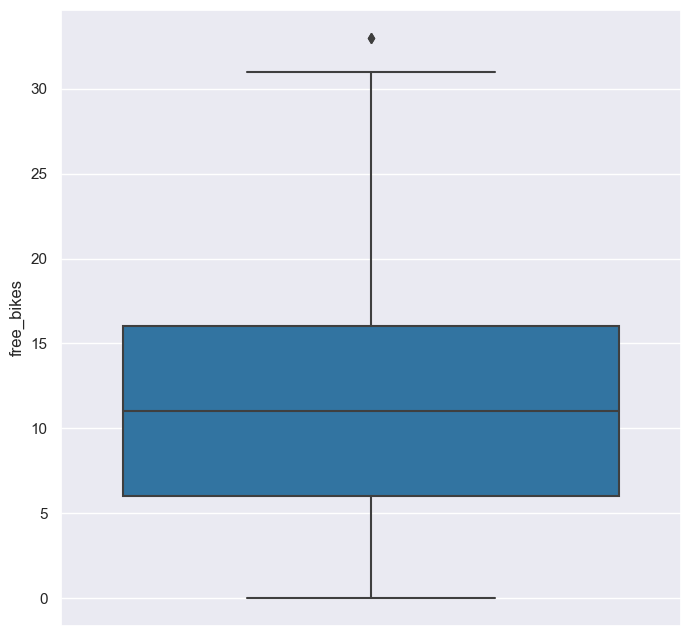

In [43]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.free_bikes, color='tab:blue')

Text(0, 0.5, 'Station Name')

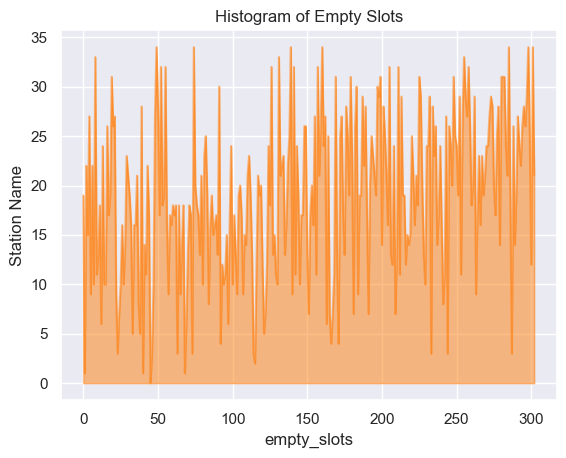

In [48]:
live_station_data.empty_slots.plot.area(color='tab:orange',stacked=None)
plt.title('Histogram of Empty Slots')
plt.xlabel('empty_slots')
plt.ylabel('Station Name')

<AxesSubplot:ylabel='empty_slots'>

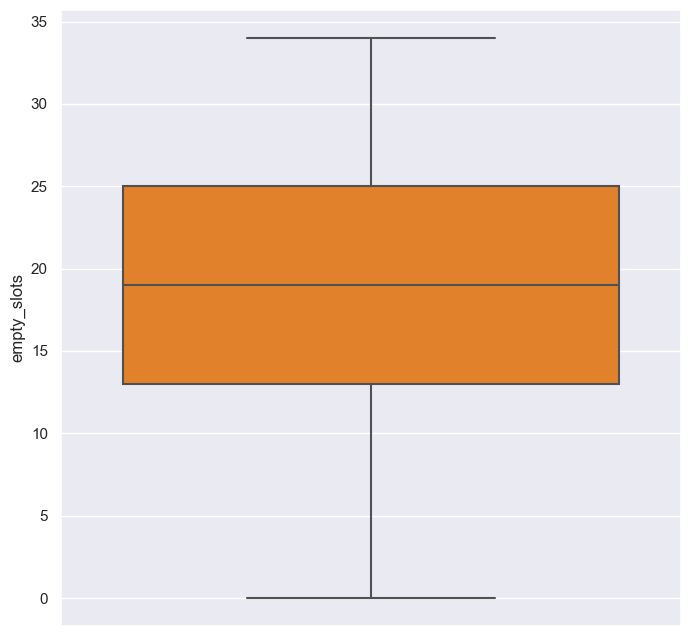

In [51]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.empty_slots, color='tab:orange')